C:\Users\sutar\AppData\Local\Temp\ipykernel_18888\2379084982.py:104: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\sutar\AppData\Local\Temp\ipykernel_18888\2379084982.py:227: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_test_e.append(math.exp(Y_test[i]))
C:\Users\sutar\AppData\Local\Temp\ipykernel_18888\2379084982.py:228: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_predict_e.append(math.exp(Y_predict[i]))


0.3560941706980208


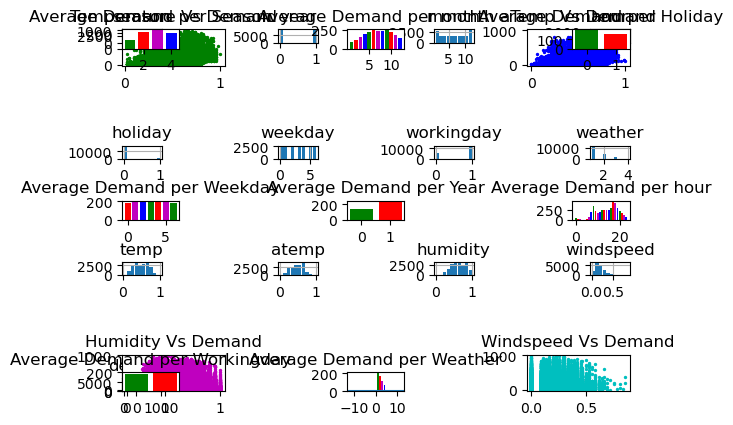

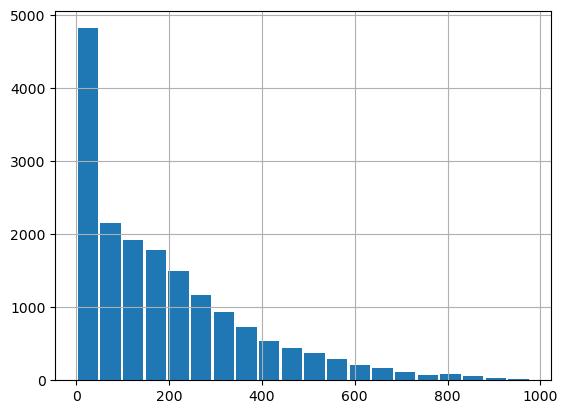

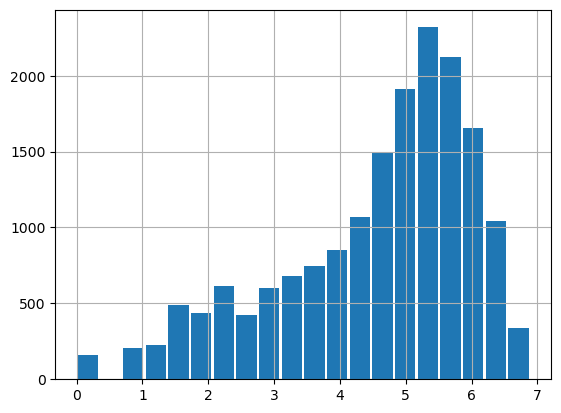

In [3]:
# Bike Sharing Demand prediction Project for the hourly dataset
# 
# Prerequisites
# - Knowledge of basic Python
# - Statistics
# - Data Processing
# - Multiple Linear regression



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math



bikes = pd.read_csv('hour.csv')



bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)

bikes_prep.isnull().sum()

# Create pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()


#
# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()



colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()



bikes_prep['demand'].describe()

bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])



correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()


bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)



df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])




t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()


# -----------------------------------------------------------------------------
# - Create Dummy Variables and drop first to avoid dummy variables trap
# -----------------------------------------------------------------------------
# - season
# - holiday
# - weather
# - month
# - hour
#
# Using get_dummies
#
bikes_prep_lag.dtypes

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)


# ----------------------------------------------------------
# Step 8 - Create Train and test split
# ----------------------------------------------------------

# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


# ----------------------------------------------------------
# Step 9 - Fit and Score the model
# ----------------------------------------------------------
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))


# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)














